# Analiza skupień

Ładujemy niezbędne pakiety

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)

Wczytujemy dane

In [3]:
klienci_banku = pd.read_csv('banking_data.csv')

Wyświetlamy pierwsze wiersze

In [4]:
klienci_banku.head()

,oszczednosci,wiek,zarobki
0,0.134,50,7141.52
1,0.125,34,4841.35
2,0.048,34,2415.62
3,0.241,30,2610.52
4,0.081,45,2431.64


Podsumowanie statystyczne ramki danych

In [5]:
klienci_banku.describe()

,oszczednosci,wiek,zarobki
count,315.000000,315.000000,315.000000
mean,0.187254,31.533333,3805.114444
std,0.128894,8.532516,1478.558643
min,0.000000,18.000000,2016.190000
25%,0.062000,25.000000,2551.080000
50%,0.215000,31.000000,3477.910000
75%,0.287500,37.000000,4530.805000
max,0.486000,54.000000,7972.000000


Stwórz punktowy wykres obserwacji 3D

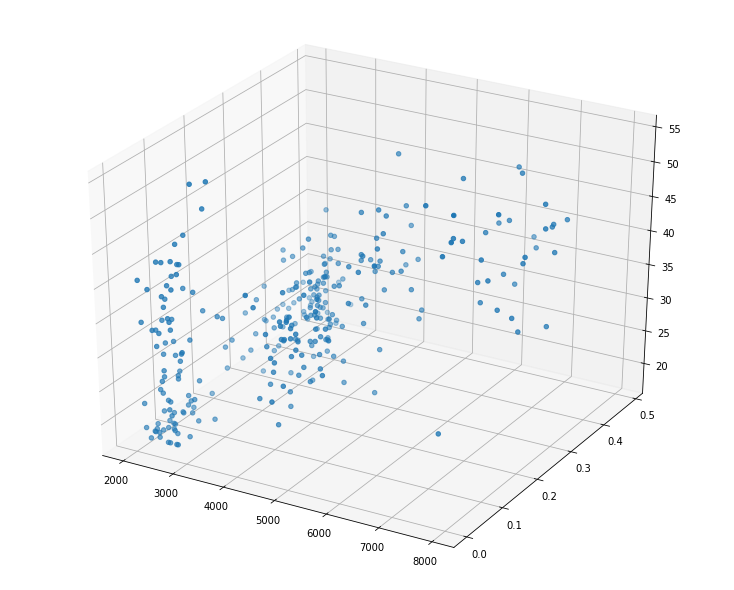

In [6]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
ax.scatter(klienci_banku['zarobki'], klienci_banku['oszczednosci'], klienci_banku['wiek'])
plt.show()

Histogram wieku klientów

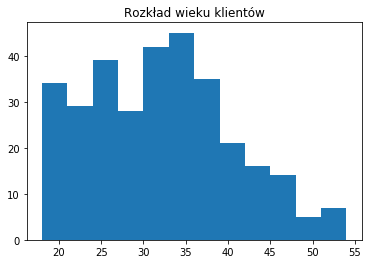

In [7]:
klienci_banku['wiek'].hist(bins=12)
plt.title('Rozkład wieku klientów')
plt.grid(None)
plt.show()

Histogram udziału oszczędności w dochodach

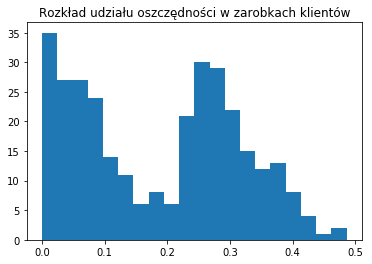

In [8]:
klienci_banku['oszczednosci'].hist(bins=20)
plt.title('Rozkład udziału oszczędności w zarobkach klientów')
plt.grid(None)
plt.show()

Rozdkład zarobków klientów

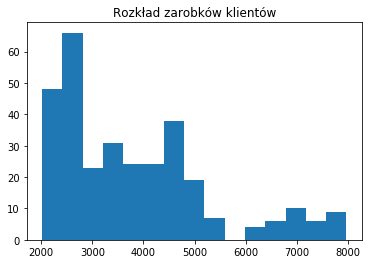

In [9]:
klienci_banku['zarobki'].hist(bins=15)
plt.title('Rozkład zarobków klientów')
plt.grid(None)
plt.show()

Zdefiniuj funkcję przyjmującą dwa wektory i zwracającą odległośc euklidesową między nimi. Oblicz odległość dla przykładowych wektorów x = [10,20], y=[10,22]

In [10]:
def odleglosc_euklidesowa(obserwacja1, obserwacja2):
    return np.sqrt(np.sum((obserwacja1 - obserwacja2) ** 2))

odleglosc_euklidesowa(np.array([10,20]), np.array([10,22]))

2.0

Oblicz odległość euklidesową między pierwszym a drugim klientem banku

In [11]:
print(klienci_banku.iloc[0,:])
print(klienci_banku.iloc[1,:])
odleglosc_euklidesowa(klienci_banku.iloc[0], klienci_banku.iloc[1])

oszczednosci       0.134
wiek              50.000
zarobki         7141.520
Name: 0, dtype: float64
oszczednosci       0.125
wiek              34.000
zarobki         4841.350
Name: 1, dtype: float64


2300.2256474052715

Dokonaj standaryzacji danych (od każdej zmiennej odejmij średnią, i podziel przez jej odchylenie standardowe)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
klienci_banku[klienci_banku.columns] = scaler.fit_transform(klienci_banku)


# ręcznie wyglądałoby to tak:
# ((klienci_banku - klienci_banku.mean()) / klienci_banku.std(ddof=0)).head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
klienci_banku.head()

,oszczednosci,wiek,zarobki
0,-0.413818,2.167713,2.260116
1,-0.483754,0.289550,0.701957
2,-1.082095,0.289550,-0.941258
3,0.417642,-0.179991,-0.809231
4,-0.825663,1.580787,-0.930406


Dokonaj klastrowania metodą k-średnich. Przyjmij liczbę skupień jako 3

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(klienci_banku)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


Do którego skupienia przyporządkowano poszczególne obserwacje?

In [15]:
kmeans.labels_

array([2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 2,
       0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0,
       2, 0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2,
       0, 0, 2, 0, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2,
       2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1,
       1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0,
       0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,

Jakie są centra skupień? jak byś je scharakteryzował?

In [16]:
kmeans.cluster_centers_

array([[-0.99400896, -0.21688314, -0.42363698],
       [ 0.85707929, -0.35009972, -0.29225436],
       [ 0.66712102,  1.25746327,  1.64552968]])

In [17]:
scaler.inverse_transform(kmeans.cluster_centers_)

array([[   0.05933571,   29.68571429, 3179.73735714],
       [   0.29755085,   28.55084746, 3373.68567797],
       [   0.27310526,   42.24561404, 6234.26157895]])

Przedstaw na wykresie 3D dane, a kolorem oznacz numer skupiska

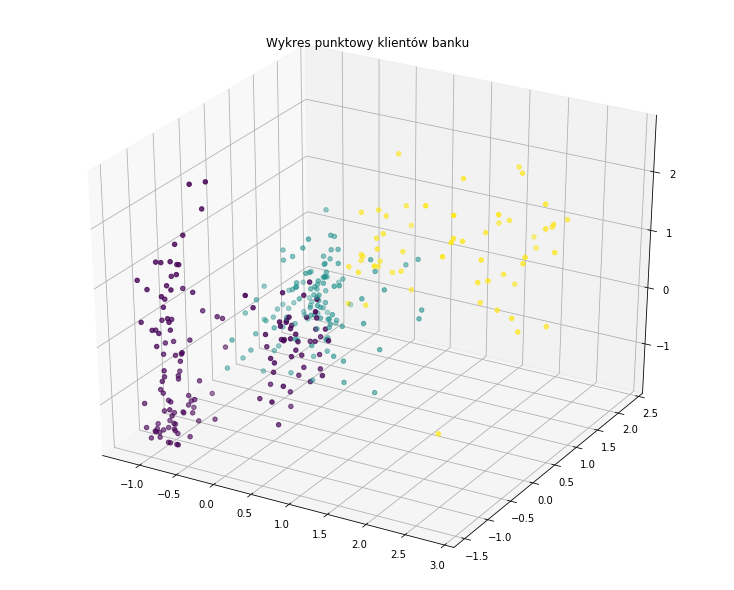

In [18]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

ax.scatter(
    klienci_banku['zarobki'],
    klienci_banku['oszczednosci'],
    klienci_banku['wiek'],
    c=kmeans.labels_
)
plt.title('Wykres punktowy klientów banku')
plt.show()

Przedstaw miary jakości klastrowania dla tego modelu

In [19]:
from sklearn import metrics

In [20]:
kmeans.inertia_

393.8987614153482

In [21]:
metrics.silhouette_score(klienci_banku, kmeans.labels_, metric='euclidean')

0.38231331451362655

In [22]:
metrics.calinski_harabaz_score(klienci_banku, kmeans.labels_)

218.2586025665421

Stwórz pętlę, która będzie tworzyłą modele k-średnich dla liczby skupień z zakresu (2,12), i zapisz po kolei miary jakości dopasowania do kolejnych list

In [23]:
inertia_scores = []
silhouette_scores = []
calinski_harabaz_scores = []

for i in range(2,12):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(klienci_banku)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(metrics.silhouette_score(klienci_banku, kmeans.labels_, metric='euclidean'))
    calinski_harabaz_scores.append(metrics.calinski_harabaz_score(klienci_banku, kmeans.labels_))
    

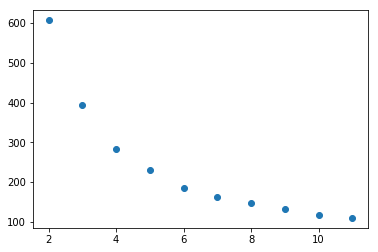

In [24]:
plt.scatter(x=np.arange(2,12), y=inertia_scores)

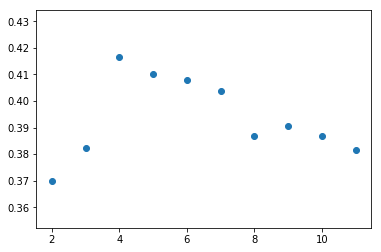

In [25]:
plt.scatter(x=np.arange(2,12), y=silhouette_scores)

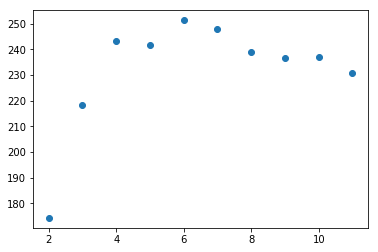

In [26]:
plt.scatter(x=np.arange(2,12), y=calinski_harabaz_scores)

Samodzielnie. Dokonaj grupowania metodą k-średnich za pomocą odpowiednio wybranej liczby skupień. Jak scharakteryzujesz tak powstałe grupy klientów banku?

In [27]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(klienci_banku)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


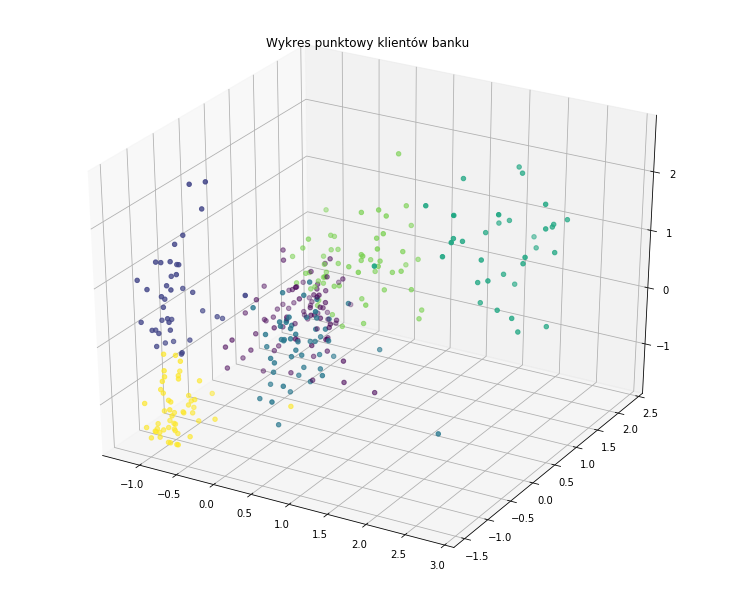

In [28]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

ax.scatter(
    klienci_banku['zarobki'],
    klienci_banku['oszczednosci'],
    klienci_banku['wiek'],
    c=kmeans.labels_
)
plt.title('Wykres punktowy klientów banku')
plt.show()

In [29]:
scaler.inverse_transform(kmeans.cluster_centers_)

array([[   0.3021519 ,   25.94936709, 3069.12759494],
       [   0.0412    ,   38.05      , 2562.45025   ],
       [   0.10096154,   32.01923077, 4544.00807692],
       [   0.28332353,   43.85294118, 7075.55941176],
       [   0.28372414,   36.46551724, 4254.26844828],
       [   0.04092308,   20.96153846, 2500.90288462]])

#### Metoda aglomeracyjna

Przeprowadź proces grupowania za pomocą metody aglomeracyjnej. Wykorzystaj metrykę euklidesową, a jako wiązanie - metodę Warda. Wykreśl dendrogram, i wizualnie oceń na ile klastrów powinno podzielić się daną zbiorowość

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

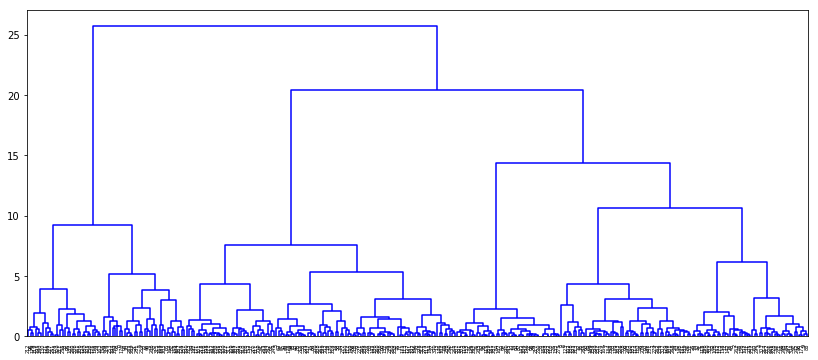

In [31]:
linkage_matrix = linkage(klienci_banku, 'ward')
plt.figure(figsize=(14,6))
dendrogram(linkage_matrix, color_threshold=0)
plt.show()

Przyporządkuj każdą obserwację do odpowiedniego klastra (przyjmij 3 klastry)

In [32]:
numer_klastra = fcluster(linkage_matrix, t=3, criterion='maxclust')
print(numer_klastra)

[1 3 3 2 3 1 3 3 3 3 3 3 3 2 3 2 3 2 2 2 1 1 3 3 3 3 3 2 2 1 3 3 3 3 2 3 3
 1 1 1 2 2 3 3 1 3 3 2 3 2 2 3 3 3 3 2 2 3 2 2 3 2 2 2 2 1 3 3 1 3 2 2 1 1
 3 2 3 2 2 2 2 1 3 3 3 2 3 3 3 2 2 3 3 1 3 1 1 3 3 3 2 2 3 3 1 1 2 2 3 2 3
 2 2 2 3 3 2 2 3 3 3 1 3 3 1 1 2 2 1 3 1 3 3 2 3 3 1 1 3 3 2 2 3 2 2 2 2 3
 3 2 3 3 2 3 3 1 3 2 1 3 3 1 2 1 1 2 3 3 1 3 2 2 3 3 1 1 1 2 2 1 1 3 1 3 2
 3 2 2 3 3 2 3 2 3 1 1 3 2 2 2 2 3 2 1 3 3 1 2 2 2 2 1 1 3 3 2 2 3 2 1 3 2
 2 2 2 2 3 1 3 2 1 3 3 1 3 1 2 3 3 3 1 3 3 3 2 3 2 3 3 2 2 1 3 1 2 3 1 1 2
 1 2 2 3 3 3 3 1 1 3 1 1 3 3 2 3 3 3 2 2 3 2 1 2 2 2 3 2 3 2 3 3 2 3 2 3 2
 3 3 2 3 2 3 3 3 3 3 1 3 3 1 2 2 2 1 1]


In [37]:
srednie = klienci_banku.groupby(numer_klastra).mean()
srednie

,oszczednosci,wiek,zarobki
1,0.744495,1.135090,1.513232
2,0.844173,-0.411530,-0.402831
3,-0.983539,-0.195697,-0.372804


In [38]:
scaler.inverse_transform(srednie)

array([[   0.2830625 ,   41.203125  , 6038.96203125],
       [   0.29588991,   28.02752294, 3210.45110092],
       [   0.0606831 ,   29.86619718, 3254.77683099]])

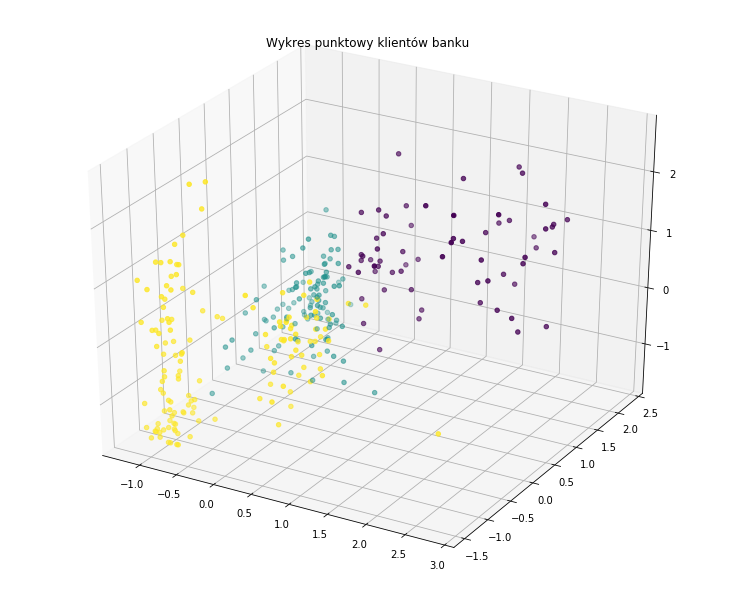

In [33]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

ax.scatter(
    klienci_banku['zarobki'],
    klienci_banku['oszczednosci'],
    klienci_banku['wiek'],
    c=numer_klastra
)
plt.title('Wykres punktowy klientów banku')
plt.show()

Samodzielnie - za pomocą analizy skupień scharakteryzuj dane dotyczące sytuacji mieszkaniowej w kalifornii (Zbiór danych California Housing dataset)

In [34]:
california_housing = pd.read_csv('california_housing.csv')

In [35]:
ch = california_housing.iloc[:,[1,2,4]]

In [36]:
ch.head(10)

,HouseAge,AveRooms,Population
0,41.0,6.984127,322.0
1,21.0,6.238137,2401.0
2,52.0,8.288136,496.0
3,52.0,5.817352,558.0
4,52.0,6.281853,565.0
5,52.0,4.761658,413.0
6,52.0,4.931907,1094.0
7,52.0,4.797527,1157.0
8,42.0,4.294118,1206.0
9,52.0,4.970588,1551.0


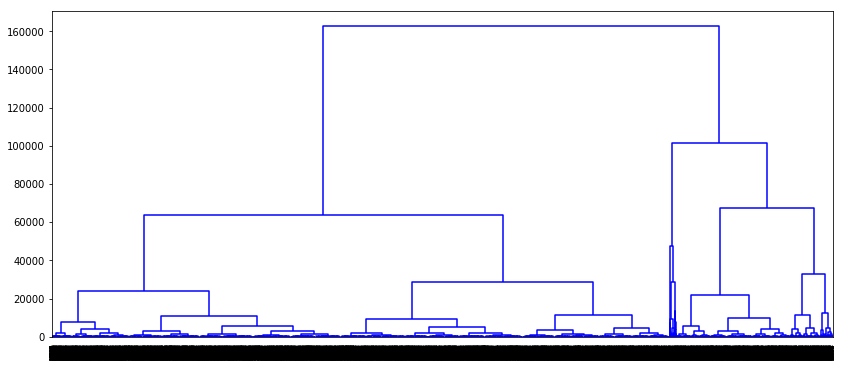

In [38]:
linkage_matrix = linkage(ch, 'ward')
plt.figure(figsize=(14,6))
dendrogram(linkage_matrix, color_threshold=0)
plt.show()

In [39]:
numer_klastra = fcluster(linkage_matrix, t=6, criterion='maxclust')
print(numer_klastra)

[1 5 1 ... 2 1 2]


In [40]:
srednie = ch.groupby(numer_klastra).mean()
srednie

,HouseAge,AveRooms,Population
1,31.955529,5.772424,636.920373
2,29.071010,5.269405,1343.692290
3,12.500000,5.317508,32124.000000
4,12.427673,5.772886,8233.433962
5,23.622523,5.099915,2318.734808
6,18.655111,5.173922,3980.399111


In [41]:
scaler.inverse_transform(srednie)

array([[       4.29958664,       80.70839156,   944033.24790243],
       [       3.92838005,       76.42319296,  1987376.9206204 ],
       [       1.79586943,       76.83297383, 47425570.6295892 ],
       [       1.78656171,       80.71232719, 12158081.50415058],
       [       3.22721844,       74.97931001,  3426744.29942545],
       [       2.58796598,       75.60977758,  5879709.52559504]])

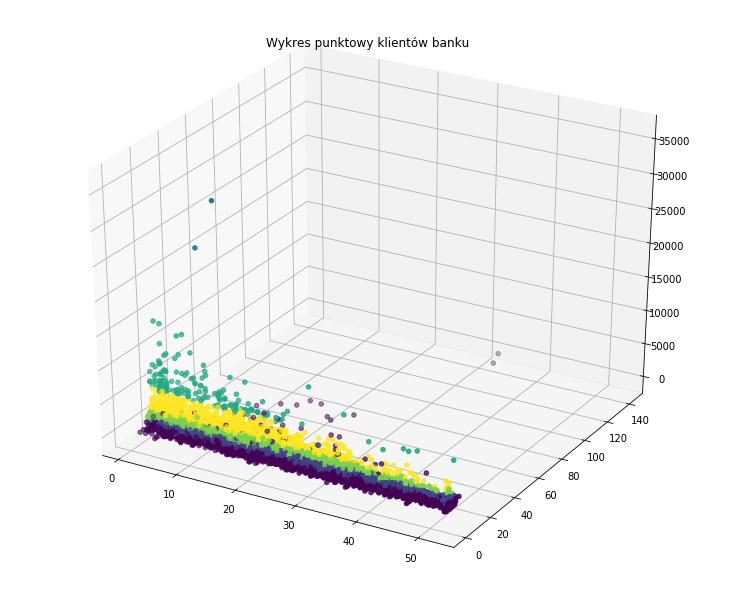

In [42]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

ax.scatter(
    ch['HouseAge'],
    ch['AveRooms'],
    ch['Population'],
    c=numer_klastra
)
plt.title('Wykres punktowy klientów banku')
plt.show()